In [185]:
# import tensorflow as tf
import gym
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
def choose_epsilon_greedy_action(env, epsilon, q, s):
    return np.random.choice(env.action_space.n) if np.random.random() < epsilon else np.argmax(q[s,:])

In [180]:
def qlearning_algorithm(env, q, learning_rate, discount, epsilon, **kwargs):
    done = False
    n_steps = 0
    r_total = 0
    
#     initialise state
    s = env.reset()
    
#     Q-learning
    while not done:

#         choose action from state using q
        a = choose_epsilon_greedy_action(env, epsilon, q, s)

#         take action (returns: observation, reward, done, info)
        s_next, r, done, _ = env.step(a)

#         update q
        q[s,a] += learning_rate * (r + discount * np.max(q[s_next,:]) - q[s,a])

#         update state
        s = s_next

        n_steps += 1
        r_total += r
    
    return n_steps, r_total

In [181]:
def sarsa_algorithm(env, q, learning_rate, discount, epsilon, **kwargs):
    done = False
    n_steps = 0
    r_total = 0
    
#     initialise state
    s = env.reset()
    
#     choose action from state using q
    a = choose_epsilon_greedy_action(env, epsilon, q, s)
    
#     Q-learning
    while not done:

#         take action (returns: observation, reward, done, info)
        s_next, r, done, _ = env.step(a)
    
#         choose next action from next state using q
        a_next = choose_epsilon_greedy_action(env, epsilon, q, s_next)

#         update q
        q[s,a] += learning_rate * (r + discount * q[s_next,a_next] - q[s,a])

#         update state
        s = s_next
        a = a_next

        n_steps += 1
        r_total += r
    
    return n_steps, r_total

In [182]:
def run_episodes(env, algorithm, n_episodes, **kwargs):
    
    q = np.zeros((n_states, n_actions), dtype=np.float)

    episode_steps = []
    episode_rewards = []

    for _ in range(n_episodes):

        n_steps, r_total = algorithm(env, q, **kwargs)
            
        episode_steps.append(n_steps)
        episode_rewards.append(r_total)
    
    return episode_steps, episode_rewards

In [183]:
def plot(episode_steps, episode_rewards, title):
    fig, ax = plt.subplots(1,2, figsize=(20, 5))

    ax[0].plot(range(episode_steps.__len__()), episode_steps)
    ax[0].set_ylabel('Episode length')
    ax[0].set_xlabel('Episode #')

    ax[1].plot(range(episode_rewards.__len__()), episode_rewards)
    ax[1].set_ylabel('Episode reward')
    ax[1].set_xlabel('Episode #')
    
    plt.suptitle(title)
    plt.show()
    
    return True

[2017-02-28 14:39:48,799] Making new env: FrozenLake-v0


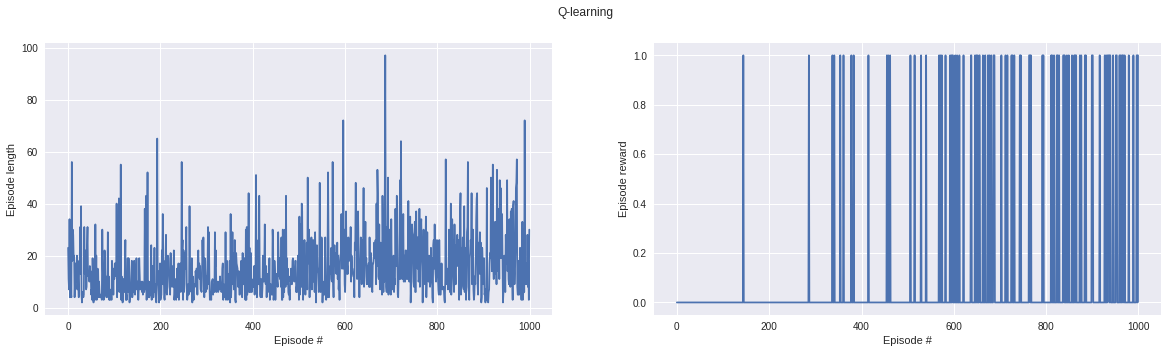

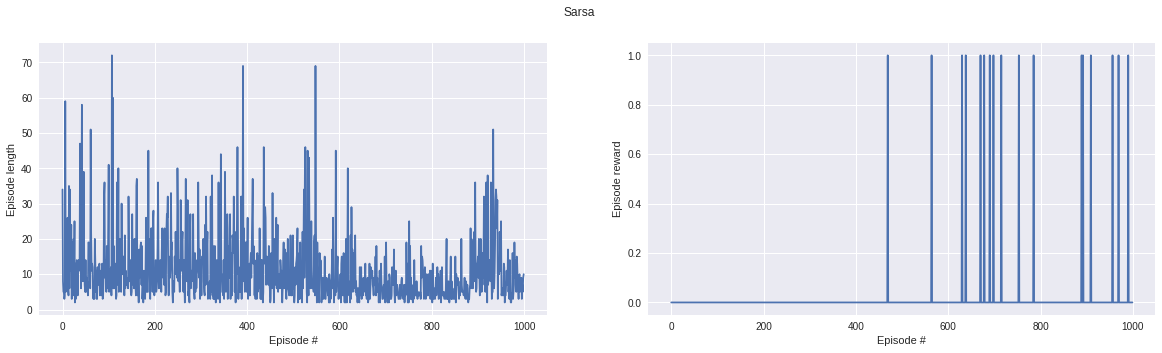

True

In [184]:
env = gym.make('FrozenLake-v0')

# seed the gym environment and numpy
env.seed(1234)
np.random.seed(1234)

n_states = env.observation_space.n
n_actions = env.action_space.n

discount = .9
learning_rate = .1
n_episodes = 1000
epsilon = 0.2

# run Q-learning
qlearning_episode_steps, qlearning_episode_rewards = run_episodes(env=env, algorithm=qlearning_algorithm, learning_rate=learning_rate, discount=discount, epsilon=epsilon, n_episodes=n_episodes)

# run Sarsa
sarsa_episode_steps, sarsa_episode_rewards = run_episodes(env=env, algorithm=sarsa_algorithm, learning_rate=learning_rate, discount=discount, epsilon=epsilon, n_episodes=n_episodes)

# plot Q-learning
plot(qlearning_episode_steps, qlearning_episode_rewards, title='Q-learning')

# plot Sarsa
plot(sarsa_episode_steps, sarsa_episode_rewards, title='Sarsa')